In [5]:
from MetricLearning.src.metric_learning_adjacent.build_graphs import *
from tqdm import tqdm
import pandas as pd
import seaborn as sns

In [6]:
feature_names = ['x', 'y', 'z', 'cell_count', 'cell_val', 'leta', 'lphi', 'lx', 'ly', 'lz', 'geta', 'gphi']

In [60]:
def plot_noise_distribution(is_noise = True, is_ratio = False):
    num_events = 100
    pv_average = pd.DataFrame()
    for i in tqdm(range(1000, 1000 + num_events)):
        event_name = f"event00000{i}.pickle"
        data_path = "/global/cfs/cdirs/m3443/usr/aoka/data/classify/Classify_Example_all/preprocess_raw"
        hits, truth = load_event(data_path, event_name)
        
        noise_hits = hits[truth['particle_id']==0]
        if not is_noise:
            noise_hits = hits
        
        df_noise = pd.DataFrame(list(zip(noise_hits['volume_id'], noise_hits['layer_id'], np.ones(len(noise_hits)))), columns = ['volume_id', 'layer_id', 'noise_counts'])
        pv_noise = df_noise.pivot_table(values='noise_counts',index='layer_id',columns='volume_id', aggfunc=np.sum)
        
        if is_ratio:
            df_total = pd.DataFrame(list(zip(hits['volume_id'], hits['layer_id'], np.ones(len(hits)))), columns = ['volume_id', 'layer_id', 'counts'])
            pv_total = df_total.pivot_table(values='counts',index='layer_id',columns='volume_id', aggfunc=np.sum)
            pv_noise /= pv_total
        
        if pv_average.empty:
            pv_average = pv_noise
        else:
            pv_average += pv_noise
    pv_average /= num_events
    sns.heatmap(pv_average, cmap = sns.cm.rocket_r)

100%|██████████| 100/100 [00:11<00:00,  8.61it/s]


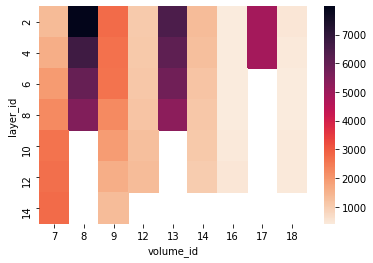

In [61]:
plot_noise_distribution(is_noise = False) # total hits

100%|██████████| 100/100 [00:04<00:00, 24.76it/s]


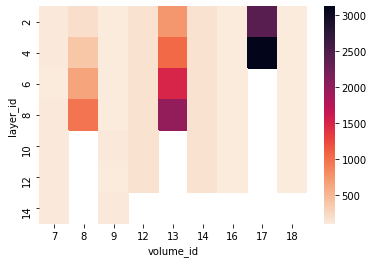

In [62]:
plot_noise_distribution() # noise hits

100%|██████████| 100/100 [00:14<00:00,  7.14it/s]


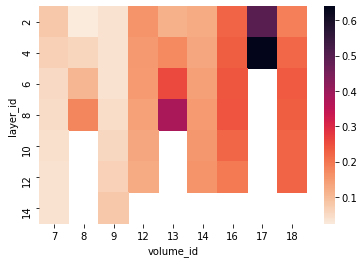

In [63]:
plot_noise_distribution(is_ratio = True) # noise ratio